# Sentiment Analysis on Topics

### Goal: sentiment analysis on each topic discussed in a review and rating the product accordingly

#### Importing Libraries

In [138]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pprint

In [139]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/harika_pradeep/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [140]:
#Loading the file with dominent topic and topic contribution percentage on each sentence. 
#This data frame is saved from topic distribution notebook file.
df = pd.read_csv("/Users/harika_pradeep/Downloads/df_topic_sents_keywords.csv", index_col = 0)

In [141]:
df.shape

(300677, 4)

In [142]:
df.head(5)

,Dominant_Topic,Perc_Contribution,Topic_Keywords,0
0,5.0,0.2258,"rice, quiet, combined, hard, owned, entire, beeping, burn, pressure, recipe","['excited', 'soon', 'followed', 'manual', 'setting', 'brown', 'rice', 'recipe', 'included', 'cookbook', 'instead', 'using', 'rice', 'program', 'button', 'brown_rice']"
1,5.0,0.1607,"rice, quiet, combined, hard, owned, entire, beeping, burn, pressure, recipe","['ended', 'best', 'texture', 'brown', 'jasmine', 'rice', 'jasmine_rice']"
2,5.0,0.1852,"rice, quiet, combined, hard, owned, entire, beeping, burn, pressure, recipe","['plus', 'aroma', 'stayed', 'rice', 'really', 'fragrant', 'read', 'manual', 'figure', 'rice', 'program', 'work', 'well', 'super', 'simple', 'manually', 'read_manual']"
3,5.0,0.1967,"rice, quiet, combined, hard, owned, entire, beeping, burn, pressure, recipe","['quietest', 'rice', 'cooker', 'pressure', 'cooker', 'seen', 'owned', 'separate', 'one', 'combined', 'cooker', 'like', 'rice_cooker', 'pressure_cooker']"
4,5.0,0.1303,"rice, quiet, combined, hard, owned, entire, beeping, burn, pressure, recipe","['quiet', 'musical', 'beeping', 'opening', 'closing', 'tiny', 'whisper', 'steam', 'throughout', 'whole', 'cooking', 'time']"


In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300677 entries, 0 to 300676
Data columns (total 4 columns):
Dominant_Topic       300677 non-null float64
Perc_Contribution    300677 non-null float64
Topic_Keywords       300677 non-null object
0                    300677 non-null object
dtypes: float64(2), object(2)
memory usage: 11.5+ MB


In [144]:
# Setting the coloumns names adding document number for each sentence
df_dominant_topic = df.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

In [145]:
df_dominant_topic.head(5)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,5.0,0.2258,"rice, quiet, combined, hard, owned, entire, beeping, burn, pressure, recipe","['excited', 'soon', 'followed', 'manual', 'setting', 'brown', 'rice', 'recipe', 'included', 'cookbook', 'instead', 'using', 'rice', 'program', 'button', 'brown_rice']"
1,1,5.0,0.1607,"rice, quiet, combined, hard, owned, entire, beeping, burn, pressure, recipe","['ended', 'best', 'texture', 'brown', 'jasmine', 'rice', 'jasmine_rice']"
2,2,5.0,0.1852,"rice, quiet, combined, hard, owned, entire, beeping, burn, pressure, recipe","['plus', 'aroma', 'stayed', 'rice', 'really', 'fragrant', 'read', 'manual', 'figure', 'rice', 'program', 'work', 'well', 'super', 'simple', 'manually', 'read_manual']"
3,3,5.0,0.1967,"rice, quiet, combined, hard, owned, entire, beeping, burn, pressure, recipe","['quietest', 'rice', 'cooker', 'pressure', 'cooker', 'seen', 'owned', 'separate', 'one', 'combined', 'cooker', 'like', 'rice_cooker', 'pressure_cooker']"
4,4,5.0,0.1303,"rice, quiet, combined, hard, owned, entire, beeping, burn, pressure, recipe","['quiet', 'musical', 'beeping', 'opening', 'closing', 'tiny', 'whisper', 'steam', 'throughout', 'whole', 'cooking', 'time']"


In [146]:
df_dominant_topic.columns

Index(['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords',
       'Text'],
      dtype='object')

#### Exploring just  topics and keywords in the topics to lable them to make our analysis more interesting

In [147]:
df_topics =df_dominant_topic[['Dominant_Topic', 'Keywords']]

In [148]:
df_topics.shape

(300677, 2)

In [149]:
df_topics.head(5)

,Dominant_Topic,Keywords
0,5.0,"rice, quiet, combined, hard, owned, entire, beeping, burn, pressure, recipe"
1,5.0,"rice, quiet, combined, hard, owned, entire, beeping, burn, pressure, recipe"
2,5.0,"rice, quiet, combined, hard, owned, entire, beeping, burn, pressure, recipe"
3,5.0,"rice, quiet, combined, hard, owned, entire, beeping, burn, pressure, recipe"
4,5.0,"rice, quiet, combined, hard, owned, entire, beeping, burn, pressure, recipe"


##### Dropping the duplicates and keeping one occurence of Topic and its keywords combination (we should be getting just 10

In [150]:
df_topics.drop_duplicates(keep='first',inplace=True)

/Users/harika_pradeep/miniconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [151]:
#Sorting them in order and restting their index
df_topics.sort_values(['Dominant_Topic'],inplace=True)

/Users/harika_pradeep/miniconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [152]:
df_topics.reset_index(drop=True,inplace=True)

In [153]:
pd.set_option('display.max_colwidth', -1)

In [154]:
df_topics

,Dominant_Topic,Keywords
0,0.0,"count, hate, changing, debating, cooker, addict, posted, sushi_rice, faded, picking"
1,1.0,"slightly, cooker, preparation, fence, simutaneously, egg, small, tinola, goodness, friendly"
2,2.0,"channel, handy, explained, update, worth_every, caused, daily, release, complaint, tomato_sauce"
3,3.0,"hulking, needed, tomato, deglazing, musical, productdon, kobacha, water, unit, worth_money"
4,4.0,"handle, quiet, immediately, hour, continues, uncooked, tomato, authentic, winter, regular"
5,5.0,"rice, quiet, combined, hard, owned, entire, beeping, burn, pressure, recipe"
6,6.0,"vegetarian, cream, exceeded_expectation, combination, great, store, basic, veggie, fast, catcher"
7,7.0,"automates, macerated, drain, long, button, fast, curious, unnecessary, attempt, capacity"
8,8.0,"super, read_manual, meat, prep, southpaw, hard, sweet_potato, ruined, troubleshooting, chuck"
9,9.0,"perform, searching, user, cooker, mild, bistek, butter, elaborate, plan, specifically"


#### Labeling Topics

##### Understanding the words in the topics and labeling them with the possible single word.
Topic 0: count, hate, changing, debating, cooker, addict, posted, sushi_rice, faded, picking : Possibly "Logivity"  <br> Topic 1: slightly, cooker, preparation, fence, simutaneously, egg, small, tinola, goodness, friendly : Possibly "Portability" <br> Topic 2: channel, handy, explained, update, worth_every, caused, daily, release, complaint, tomato_sauce : Possibly "Regular-Use" <br> Topic 3: hulking, needed, tomato, deglazing, musical, productdon, kobacha, water, unit, worth_money : Possibly "Price_worthy"  <br> Topic 4: handle, quiet, immediately, hour, continues, uncooked, tomato, authentic, winter, regular : Possibly "Performance" <br> Topic 5: rice, quiet, combined, hard, owned, entire, beeping, burn, pressure, recipe : Possibly "Options"  <br> Topic 6: vegetarian, cream, exceeded_expectation, combination, great, store, basic, veggie, fast, catcher : Possibly "Time_saving" <br> Topic 7: automates, macerated, drain, long, button, fast, curious, unnecessary, attempt, capacity : Possibly "Quality" <br> Topic 8: super, read_manual, meat, prep, southpaw, hard, sweet_potato, ruined, troubleshooting, chuck : Possibly "Instructional" <br> Topic 9: perform, searching, user, cooker, mild, bistek, butter, elaborate, plan, specifically : Possibly "Recipie_modes"

In [155]:
#Now labeling in actual df_dominant_topic dataframe.
df_dominant_topic = df_dominant_topic.replace({'Dominant_Topic': {0.0: 'Logivity', 1.0: 'Portability', 
                                                                  2.0: 'Regular-Use', 3.0: 'Price_worthy', 
                                                                  4.0: 'Performance', 5.0: 'Options', 6.0: 'Time_saving', 
                                                                  7.0: 'Quality', 8.0: 'Instructional', 
                                                                  9.0: 'Recipie_modes'}})

In [156]:
df_dominant_topic.head(3)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,Options,0.2258,"rice, quiet, combined, hard, owned, entire, beeping, burn, pressure, recipe","['excited', 'soon', 'followed', 'manual', 'setting', 'brown', 'rice', 'recipe', 'included', 'cookbook', 'instead', 'using', 'rice', 'program', 'button', 'brown_rice']"
1,1,Options,0.1607,"rice, quiet, combined, hard, owned, entire, beeping, burn, pressure, recipe","['ended', 'best', 'texture', 'brown', 'jasmine', 'rice', 'jasmine_rice']"
2,2,Options,0.1852,"rice, quiet, combined, hard, owned, entire, beeping, burn, pressure, recipe","['plus', 'aroma', 'stayed', 'rice', 'really', 'fragrant', 'read', 'manual', 'figure', 'rice', 'program', 'work', 'well', 'super', 'simple', 'manually', 'read_manual']"


#### Merging this dataframe with orignal sentences dataframe based on index

In [157]:
df_sent = pd.read_csv("/Users/harika_pradeep/Downloads/top_25_sents.csv", index_col=0)

In [158]:
df_sent.head()

,asin,sentences
0,B00FLYWNYQ,I was excited to try this so as soon as I got it I followed the manual setting brown rice recipe in the included cookbook instead of using the rice program button
1,B00FLYWNYQ,I ended up with the best texture I've ever had in brown jasmine rice
2,B00FLYWNYQ,"Plus the aroma stayed in the pot, so the rice was really fragrant! I will have to read the manual to figure out how to use the rice program to see if it works as well, but it was super simple to just set it manually"
3,B00FLYWNYQ,This is the quietest rice cooker or pressure cooker I've ever seen (I've owned separate ones and one that was a combined cooker like this one)
4,B00FLYWNYQ,There was only quiet musical beeping when opening and closing the lid and one tiny whisper of steam throughout the whole cooking time


In [159]:
df_sent.shape

(300677, 2)

#### Merging df_sent (sentences for each product) with df_dominent_topic (that has topic distribution per text) 

In [160]:
# Merge two Dataframes on index of both the dataframes
mergedDf = df_dominant_topic.merge(df_sent, left_index=True, right_index=True)

In [161]:
mergedDf.head(2)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text,asin,sentences
0,0,Options,0.2258,"rice, quiet, combined, hard, owned, entire, beeping, burn, pressure, recipe","['excited', 'soon', 'followed', 'manual', 'setting', 'brown', 'rice', 'recipe', 'included', 'cookbook', 'instead', 'using', 'rice', 'program', 'button', 'brown_rice']",B00FLYWNYQ,I was excited to try this so as soon as I got it I followed the manual setting brown rice recipe in the included cookbook instead of using the rice program button
1,1,Options,0.1607,"rice, quiet, combined, hard, owned, entire, beeping, burn, pressure, recipe","['ended', 'best', 'texture', 'brown', 'jasmine', 'rice', 'jasmine_rice']",B00FLYWNYQ,I ended up with the best texture I've ever had in brown jasmine rice


In [162]:
mergedDf.describe()

,Document_No,Topic_Perc_Contrib
count,300677.000000,300677.000000
mean,150338.000000,0.134570
std,86798.117782,0.028719
min,0.000000,0.100000
25%,75169.000000,0.115400
50%,150338.000000,0.129600
75%,225507.000000,0.148100
max,300676.000000,0.754300


In [163]:
#Checking for null values if any
mergedDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300677 entries, 0 to 300676
Data columns (total 7 columns):
Document_No           300677 non-null int64
Dominant_Topic        300677 non-null object
Topic_Perc_Contrib    300677 non-null float64
Keywords              300677 non-null object
Text                  300677 non-null object
asin                  300677 non-null object
sentences             265695 non-null object
dtypes: float64(1), int64(1), object(5)
memory usage: 16.1+ MB


In [164]:
#Dropping null values on sentences
mergedDf.dropna(axis=0, how='any', inplace = True)

In [165]:
mergedDf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 265695 entries, 0 to 300676
Data columns (total 7 columns):
Document_No           265695 non-null int64
Dominant_Topic        265695 non-null object
Topic_Perc_Contrib    265695 non-null float64
Keywords              265695 non-null object
Text                  265695 non-null object
asin                  265695 non-null object
sentences             265695 non-null object
dtypes: float64(1), int64(1), object(5)
memory usage: 16.2+ MB


In [166]:
mergedDf = mergedDf.reset_index(drop = True)

#### Applying sentiment intensity analyser on sentences

In [167]:
senti = SentimentIntensityAnalyzer()
mergedDf["sentiments"] = mergedDf["sentences"].apply(lambda x: senti.polarity_scores(x))
df_senti = pd.concat([mergedDf.drop(['sentiments'], axis=1), mergedDf['sentiments'].apply(pd.Series)], axis=1)

In [168]:
df_senti.head(3)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text,asin,sentences,neg,neu,pos,compound
0,0,Options,0.2258,"rice, quiet, combined, hard, owned, entire, beeping, burn, pressure, recipe","['excited', 'soon', 'followed', 'manual', 'setting', 'brown', 'rice', 'recipe', 'included', 'cookbook', 'instead', 'using', 'rice', 'program', 'button', 'brown_rice']",B00FLYWNYQ,I was excited to try this so as soon as I got it I followed the manual setting brown rice recipe in the included cookbook instead of using the rice program button,0.0,0.921,0.079,0.3400
1,1,Options,0.1607,"rice, quiet, combined, hard, owned, entire, beeping, burn, pressure, recipe","['ended', 'best', 'texture', 'brown', 'jasmine', 'rice', 'jasmine_rice']",B00FLYWNYQ,I ended up with the best texture I've ever had in brown jasmine rice,0.0,0.741,0.259,0.6369
2,2,Options,0.1852,"rice, quiet, combined, hard, owned, entire, beeping, burn, pressure, recipe","['plus', 'aroma', 'stayed', 'rice', 'really', 'fragrant', 'read', 'manual', 'figure', 'rice', 'program', 'work', 'well', 'super', 'simple', 'manually', 'read_manual']",B00FLYWNYQ,"Plus the aroma stayed in the pot, so the rice was really fragrant! I will have to read the manual to figure out how to use the rice program to see if it works as well, but it was super simple to just set it manually",0.0,0.857,0.143,0.8016


In [39]:
#print(df_senti.loc[[0]].values)

##### Compound score is the normalized value of positive , negative and neutral values generated by SentimentIntensityAnalyzer( )

In [169]:
df_senti['compound'].describe()

count    265695.000000
mean     0.280127     
std      0.405754     
min     -0.974000     
25%      0.000000     
50%      0.318200     
75%      0.624900     
max      0.997200     
Name: compound, dtype: float64

##### Printing most negative sentence

In [170]:
 df_senti.loc[df_senti['compound'] == -0.974000]

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text,asin,sentences,neg,neu,pos,compound
22883,26098,Options,0.1375,"rice, quiet, combined, hard, owned, entire, beeping, burn, pressure, recipe","['pressure', 'angry', 'empty', 'uncooked', 'food', 'throw', 'disappointed', 'hate', 'worked', 'time', 'month']",B00FLYWNYQ,",NO PRESSURE!! I am SO angry !@@ now I have to empty all the uncooked food and throw it out and go out to eat! VERY DISAPPOINTED! //I hate it! The pot has worked only 3 times ** We've had it for about a month",0.393,0.607,0.0,-0.974


###### Printing most positive sentence 

In [171]:
df_senti.loc[df_senti['compound'] == 0.997200]

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text,asin,sentences,neg,neu,pos,compound
18454,20975,Options,0.2022,"rice, quiet, combined, hard, owned, entire, beeping, burn, pressure, recipe","['always', 'scared', 'pressure', 'cooker', 'happy', 'purchase', 'glad', 'love', 'love', 'love', 'make', 'life', 'easier', 'life', 'easier', 'love', 'husband', 'brag', 'pressure_cooker', 'happy_purchase', 'life_easier', 'life_easier']",B00FLYWNYQ,"I was always scared of pressure cookers before, but I'm so happy with this purchase! //I'm so glad I did ** WOW! WOW! WOW! Love, love, love my IP! Makes life so much easier! //LIFE IS EASIER NOW!!!! ** I love this thing, even my husband brags about it",0.035,0.328,0.637,0.9972


##### "Compound value is the normalized form of postive, negative and neutral score genrated by SentimentIntensityAnalyzer on each sentence of the reviews ranges between [-1, 1] . So labeling compund values to sentiments (positive negative and neutral). if compound is below 0 = negatve, above 0 = positive, 0 = neutral

In [172]:
#Creating a column 'Sentiment'
df_senti['sentiment'] = 1

In [173]:
df_senti.loc[df_senti['compound'] <0,'sentiment']="negative"
df_senti.loc[df_senti['compound'] >0,'sentiment']="positive"
df_senti.loc[df_senti['compound'] ==0,'sentiment']="neutral"

In [174]:
#Printing first 3 negative sentences
df_senti[df_senti['compound'] <0].head(3)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text,asin,sentences,neg,neu,pos,compound,sentiment
6,6,Time_saving,0.1379,"vegetarian, cream, exceeded_expectation, combination, great, store, basic, veggie, fast, catcher","['tell', 'cooking', 'time', 'ended', 'hear', 'chime', 'pressure', 'cycle', 'ended']",B00FLYWNYQ,"I could not tell when the cooking time ended, as I did not hear a chime when the pressure cycle ended",0.115,0.885,0.000,-0.2960,negative
24,24,Options,0.1154,"rice, quiet, combined, hard, owned, entire, beeping, burn, pressure, recipe","['tout', 'unit', 'whisper', 'quiet']",B00FLYWNYQ,"Just as it touts, this unit is whisper quiet",0.121,0.879,0.000,-0.0258,negative
26,26,Price_worthy,0.1111,"hulking, needed, tomato, deglazing, musical, productdon, kobacha, water, unit, worth_money","['elite', 'heavily', 'never', 'liked', 'tricky']",B00FLYWNYQ,"I used my Elite pc heavily, and never liked the tricky lid",0.183,0.704,0.113,-0.2235,negative


In [175]:
#Printing first 3 positive sentences
df_senti[df_senti['compound'] >0].head (3)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text,asin,sentences,neg,neu,pos,compound,sentiment
0,0,Options,0.2258,"rice, quiet, combined, hard, owned, entire, beeping, burn, pressure, recipe","['excited', 'soon', 'followed', 'manual', 'setting', 'brown', 'rice', 'recipe', 'included', 'cookbook', 'instead', 'using', 'rice', 'program', 'button', 'brown_rice']",B00FLYWNYQ,I was excited to try this so as soon as I got it I followed the manual setting brown rice recipe in the included cookbook instead of using the rice program button,0.0,0.921,0.079,0.3400,positive
1,1,Options,0.1607,"rice, quiet, combined, hard, owned, entire, beeping, burn, pressure, recipe","['ended', 'best', 'texture', 'brown', 'jasmine', 'rice', 'jasmine_rice']",B00FLYWNYQ,I ended up with the best texture I've ever had in brown jasmine rice,0.0,0.741,0.259,0.6369,positive
2,2,Options,0.1852,"rice, quiet, combined, hard, owned, entire, beeping, burn, pressure, recipe","['plus', 'aroma', 'stayed', 'rice', 'really', 'fragrant', 'read', 'manual', 'figure', 'rice', 'program', 'work', 'well', 'super', 'simple', 'manually', 'read_manual']",B00FLYWNYQ,"Plus the aroma stayed in the pot, so the rice was really fragrant! I will have to read the manual to figure out how to use the rice program to see if it works as well, but it was super simple to just set it manually",0.0,0.857,0.143,0.8016,positive


In [176]:
#Printing first 3 neutral sentences
df_senti[df_senti['compound'] == 0].head (3)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text,asin,sentences,neg,neu,pos,compound,sentiment
4,4,Options,0.1303,"rice, quiet, combined, hard, owned, entire, beeping, burn, pressure, recipe","['quiet', 'musical', 'beeping', 'opening', 'closing', 'tiny', 'whisper', 'steam', 'throughout', 'whole', 'cooking', 'time']",B00FLYWNYQ,There was only quiet musical beeping when opening and closing the lid and one tiny whisper of steam throughout the whole cooking time,0.0,1.0,0.0,0.0,neutral
5,5,Recipie_modes,0.1250,"perform, searching, user, cooker, mild, bistek, butter, elaborate, plan, specifically","['tell', 'except', 'display', 'front', 'metal', 'part', 'touch', 'side']",B00FLYWNYQ,I couldn't tell it was on except the display was lit on the front and the metal part of the lid was hot to the touch (but not the sides),0.0,1.0,0.0,0.0,neutral
8,8,Portability,0.1111,"slightly, cooker, preparation, fence, simutaneously, egg, small, tinola, goodness, friendly","['condensation', 'catcher', 'back', 'needed']",B00FLYWNYQ,"There is a condensation catcher on the back, but it wasn't needed at all",0.0,1.0,0.0,0.0,neutral


##### Graphical representation of number of negative , neutrals and  positive sentences

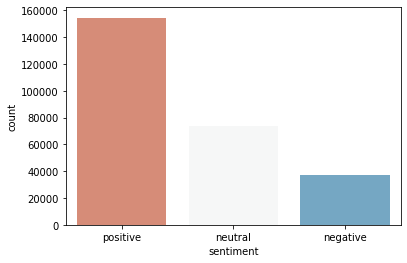

In [177]:
#Importing Seaborn and Matplotlib for graphical effects.
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure()
sns.countplot(x='sentiment', data=df_senti, palette='RdBu')
plt.xlabel('sentiment')
plt.show()

### Now getting the sentiment of each topic for a particular product.

In [181]:
df_senti.shape

(265695, 12)

In [182]:
df_senti['asin'].unique().size

25

In [183]:
df_senti['asin'].unique()

array(['B00FLYWNYQ', 'B00COK3FD8', 'B009HVH4XO', 'B00NX47YP4',
       'B00902X68W', 'B00EINBSJ2', 'B009ZJ2M7G', 'B0091YYUAM',
       'B00JVLG2KG', 'B000YGEVMI', 'B00INRW7GC', 'B019D9HESO',
       'B00AYULZEQ', 'B00LV4W8BI', 'B007WQ9YNE', 'B000M8YMEU',
       'B002S52ZDU', 'B00EQT70QS', 'B000VENLF6', 'B00ARQVLGO',
       'B000BWZ7QO', 'B002KAPNA0', 'B00Q7EV29G', 'B0015TMHSI',
       'B00T6TKYPC'], dtype=object)

#### Step 1:
1. As a first step we first need to get the number of positives for each topic in a product and devide that number with total number of sentiments(positives+negatives+neutrals) of the same topics for the same product. <br>
<br>
percentage Positive Sentiment(topic) per product = ((Number of positives(topic)) / (Total number of sentiments(topic))) <br>
<br>
2. Apply the same step 1 for negatives and neutrals <br>

In [184]:
#Creating an empty dataframe with columnnames representing topics
raw_data = {"asin":df_senti.asin.unique()}
#df_23['asin'] = df_senti.asin.unique()
#df_senti.loc[df_senti.asin=='asin'].value_counts ()
import numpy as np
[[raw_data.update({str(_i)+"_"+_j:25*[np.NaN]}) for _i in df_senti.Dominant_Topic.unique()] for _j in ["positive","negative","neutral"]]
product_sentiments = pd.DataFrame (raw_data)

In [185]:
product_sentiments.head(3)

,asin,Options_positive,Recipie_modes_positive,Time_saving_positive,Portability_positive,Logivity_positive,Price_worthy_positive,Instructional_positive,Quality_positive,Regular-Use_positive,...,Options_neutral,Recipie_modes_neutral,Time_saving_neutral,Portability_neutral,Logivity_neutral,Price_worthy_neutral,Instructional_neutral,Quality_neutral,Regular-Use_neutral,Performance_neutral
0,B00FLYWNYQ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,B00COK3FD8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,B009HVH4XO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [186]:
product_sentiments.shape

(25, 31)

In [187]:
#Fetching topics wise sentiment scores for each product and placing them in this new dataframe
import re
for idx,rows in product_sentiments.iterrows():
    asin = rows['asin']
    for _i in rows.keys ():
        if _i == 'asin':
            continue
        _m = re.search ('([\w_-]+)_((?:positive|negative|neutral))',_i)
        dominant_topic, sentiment = _m.group(1),_m.group(2)
        product_sentiments.at[idx,_i] = df_senti.loc[(df_senti.asin==asin) & (df_senti.Dominant_Topic == dominant_topic) & (df_senti.sentiment == sentiment)].shape[0]/df_senti.loc[(df_senti.asin==asin) & (df_senti.Dominant_Topic == dominant_topic)].shape[0]

In [188]:
product_sentiments.head(3)

,asin,Options_positive,Recipie_modes_positive,Time_saving_positive,Portability_positive,Logivity_positive,Price_worthy_positive,Instructional_positive,Quality_positive,Regular-Use_positive,...,Options_neutral,Recipie_modes_neutral,Time_saving_neutral,Portability_neutral,Logivity_neutral,Price_worthy_neutral,Instructional_neutral,Quality_neutral,Regular-Use_neutral,Performance_neutral
0,B00FLYWNYQ,0.540743,0.521017,0.525174,0.466079,0.271493,0.713043,0.689865,0.352941,0.839561,...,0.269780,0.335236,0.326843,0.345815,0.634777,0.169275,0.209715,0.449501,0.126335,0.465642
1,B00COK3FD8,0.494792,0.485961,0.493116,0.645600,0.415126,0.516129,0.719415,0.338235,0.868221,...,0.354167,0.395248,0.384230,0.240078,0.465546,0.313364,0.192819,0.397059,0.111714,0.437681
2,B009HVH4XO,0.502874,0.525849,0.455070,0.506410,0.358491,0.751730,0.717368,0.403636,0.806115,...,0.330460,0.302806,0.337181,0.278045,0.530522,0.121972,0.137001,0.341818,0.147325,0.300139


In [189]:
product_sentiments.to_csv('/Users/harika_pradeep/Downloads/product_sentiments.csv')

#### Step 2:
Add the total positive scores of the topics for each product. Repeat the same for negative scores and neutral scores. This gives a number representing how much positive , negative and neutral has been spoken about these products with respect to each topic.

In [192]:
df_new = product_sentiments.copy()

In [193]:
positive_columns = [_i for _i in product_sentiments.columns if 'positive' in _i]
negative_columns = [_i for _i in product_sentiments.columns if 'negative' in _i]
neutral_columns = [_i for _i in product_sentiments.columns if 'neutral' in _i]
print(positive_columns)
print(negative_columns)
print(neutral_columns)

['Options_positive', 'Recipie_modes_positive', 'Time_saving_positive', 'Portability_positive', 'Logivity_positive', 'Price_worthy_positive', 'Instructional_positive', 'Quality_positive', 'Regular-Use_positive', 'Performance_positive']
['Options_negative', 'Recipie_modes_negative', 'Time_saving_negative', 'Portability_negative', 'Logivity_negative', 'Price_worthy_negative', 'Instructional_negative', 'Quality_negative', 'Regular-Use_negative', 'Performance_negative']
['Options_neutral', 'Recipie_modes_neutral', 'Time_saving_neutral', 'Portability_neutral', 'Logivity_neutral', 'Price_worthy_neutral', 'Instructional_neutral', 'Quality_neutral', 'Regular-Use_neutral', 'Performance_neutral']


In [194]:
df_new["Positive_Sum"] = df_new.apply(lambda row: sum([row[_i] for _i in positive_columns]) ,axis=1)
df_new["Negative_Sum"] = df_new.apply(lambda row: sum([row[_i] for _i in negative_columns]) ,axis=1)
df_new["Neutral_Sum"] = df_new.apply(lambda row: sum([row[_i] for _i in neutral_columns]) ,axis=1)

In [195]:
df_new.head(3)

,asin,Options_positive,Recipie_modes_positive,Time_saving_positive,Portability_positive,Logivity_positive,Price_worthy_positive,Instructional_positive,Quality_positive,Regular-Use_positive,...,Portability_neutral,Logivity_neutral,Price_worthy_neutral,Instructional_neutral,Quality_neutral,Regular-Use_neutral,Performance_neutral,Positive_Sum,Negative_Sum,Neutral_Sum
0,B00FLYWNYQ,0.540743,0.521017,0.525174,0.466079,0.271493,0.713043,0.689865,0.352941,0.839561,...,0.345815,0.634777,0.169275,0.209715,0.449501,0.126335,0.465642,5.296047,1.371035,3.332918
1,B00COK3FD8,0.494792,0.485961,0.493116,0.645600,0.415126,0.516129,0.719415,0.338235,0.868221,...,0.240078,0.465546,0.313364,0.192819,0.397059,0.111714,0.437681,5.405581,1.302513,3.291906
2,B009HVH4XO,0.502874,0.525849,0.455070,0.506410,0.358491,0.751730,0.717368,0.403636,0.806115,...,0.278045,0.530522,0.121972,0.137001,0.341818,0.147325,0.300139,5.597406,1.575326,2.827268


#### Step 3:
For ease of understanding splitting the data to three different dataframes based on the sentiment category

In [196]:
positive_columns = [_i for _i in df_new.columns if 'positive' in _i.lower()]
negative_columns = [_i for _i in df_new.columns if 'negative' in _i.lower()]
neutral_columns = [_i for _i in df_new.columns if 'neutral' in _i.lower()]
print (positive_columns)

['Options_positive', 'Recipie_modes_positive', 'Time_saving_positive', 'Portability_positive', 'Logivity_positive', 'Price_worthy_positive', 'Instructional_positive', 'Quality_positive', 'Regular-Use_positive', 'Performance_positive', 'Positive_Sum']


In [197]:
#Creating a new dataframe with just positive scores for each topic and positive sum
df_new_positive = df_new[['asin']+positive_columns]
df_new_positive.columns =[["asin"]+[_i for _i in df_senti.Dominant_Topic.unique()]+["Positive_Sum"]]
df_new_positive ["Sentiment"] = "Positive"
df_new_positive.head(3)

/Users/harika_pradeep/miniconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,asin,Options,Recipie_modes,Time_saving,Portability,Logivity,Price_worthy,Instructional,Quality,Regular-Use,Performance,Positive_Sum,Sentiment
0,B00FLYWNYQ,0.540743,0.521017,0.525174,0.466079,0.271493,0.713043,0.689865,0.352941,0.839561,0.376130,5.296047,Positive
1,B00COK3FD8,0.494792,0.485961,0.493116,0.645600,0.415126,0.516129,0.719415,0.338235,0.868221,0.428986,5.405581,Positive
2,B009HVH4XO,0.502874,0.525849,0.455070,0.506410,0.358491,0.751730,0.717368,0.403636,0.806115,0.569863,5.597406,Positive


In [199]:
df_new_positive.to_csv("/Users/harika_pradeep/Downloads/df_new_positive.csv")

In [198]:
#Creating a new dataframe with just negatives scores for each topic and negative sum
df_new_negative = df_new[['asin']+negative_columns]
df_new_negative.columns =[["asin"]+[_i for _i in df_senti.Dominant_Topic.unique()]+["Negative_Sum"]]
df_new_negative ["Sentiment"] = "Negative"
df_new_negative.head(3)

/Users/harika_pradeep/miniconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,asin,Options,Recipie_modes,Time_saving,Portability,Logivity,Price_worthy,Instructional,Quality,Regular-Use,Performance,Negative_Sum,Sentiment
0,B00FLYWNYQ,0.189477,0.143747,0.147983,0.188106,0.093730,0.117681,0.100420,0.197558,0.034104,0.158228,1.371035,Negative
1,B00COK3FD8,0.151042,0.118790,0.122653,0.114323,0.119328,0.170507,0.087766,0.264706,0.020065,0.133333,1.302513,Negative
2,B009HVH4XO,0.166667,0.171344,0.207749,0.215545,0.110988,0.126298,0.145631,0.254545,0.046560,0.129998,1.575326,Negative


In [200]:
df_new_negative.to_csv("/Users/harika_pradeep/Downloads/df_new_negative.csv")

In [201]:
#Creating a new dataframe with just neutral scores for each topic and neutral sum
df_new_neutral = df_new[['asin']+neutral_columns]
df_new_neutral.columns =[["asin"]+[_i for _i in df_senti.Dominant_Topic.unique()]+["Neutral_Sum"]]
df_new_neutral ["Sentiment"] = "Neutral"
df_new_neutral.head(3)

/Users/harika_pradeep/miniconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,asin,Options,Recipie_modes,Time_saving,Portability,Logivity,Price_worthy,Instructional,Quality,Regular-Use,Performance,Neutral_Sum,Sentiment
0,B00FLYWNYQ,0.269780,0.335236,0.326843,0.345815,0.634777,0.169275,0.209715,0.449501,0.126335,0.465642,3.332918,Neutral
1,B00COK3FD8,0.354167,0.395248,0.384230,0.240078,0.465546,0.313364,0.192819,0.397059,0.111714,0.437681,3.291906,Neutral
2,B009HVH4XO,0.330460,0.302806,0.337181,0.278045,0.530522,0.121972,0.137001,0.341818,0.147325,0.300139,2.827268,Neutral


In [202]:
df_new_neutral.to_csv("/Users/harika_pradeep/Downloads/df_new_neutral.csv")

In [98]:
product_sentiments[['asin',"Options_positive","Options_negative","Options_neutral"]][product_sentiments.asin=="B00FLYWNYQ"]

,asin,Options_positive,Options_negative,Options_neutral
0,B00FLYWNYQ,0.540743,0.189477,0.26978


In [203]:
product_senti_score_final = df_new[['asin', 'Positive_Sum', 'Negative_Sum' , 'Neutral_Sum']]

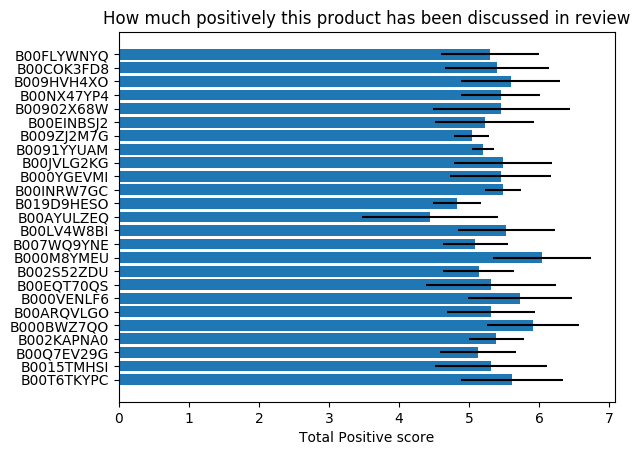

In [206]:
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
Products = product_senti_score_final['asin']
y_pos = np.arange(len(Products))
error = np.random.rand(len(Products))

ax.barh(y_pos, product_senti_score_final['Positive_Sum'], xerr=error, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(Products)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Total Positive score')
ax.set_title('How much positively this product has been discussed in review')

plt.show()

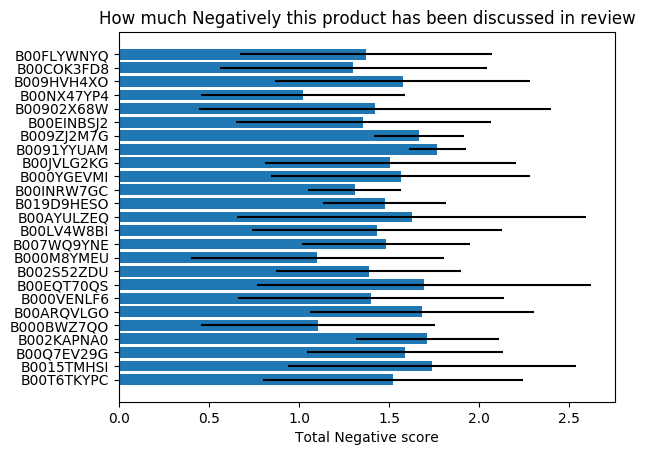

In [207]:
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
Products = product_senti_score_final['asin']
y_pos = np.arange(len(Products))
error = np.random.rand(len(Products))

ax.barh(y_pos, product_senti_score_final['Negative_Sum'], xerr=error, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(Products)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Total Negative score')
ax.set_title('How much Negatively this product has been discussed in review')

plt.show()

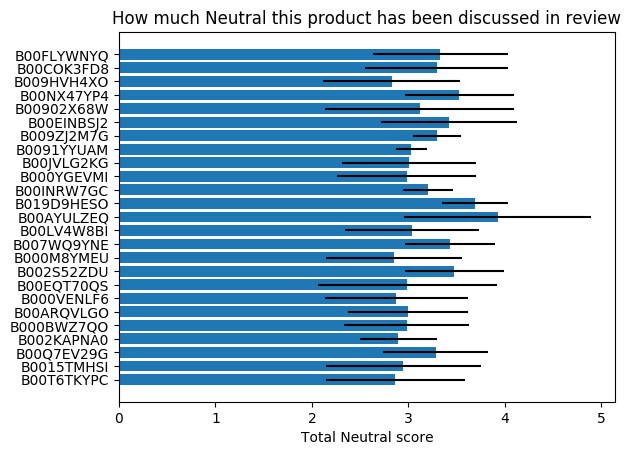

In [208]:
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
Products = product_senti_score_final['asin']
y_pos = np.arange(len(Products))
error = np.random.rand(len(Products))

ax.barh(y_pos, product_senti_score_final['Neutral_Sum'], xerr=error, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(Products)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Total Neutral score')
ax.set_title('How much Neutral this product has been discussed in review')

plt.show()

In [205]:
product_senti_score_final.to_csv("/Users/harika_pradeep/Downloads/product_senti_score_final.csv")